In [8]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [4]:
x=np.arange(-5.0,5.0, 0.1)
y=sigmoid(x)

Text(0.5, 1.0, 'Sigmoid Function')

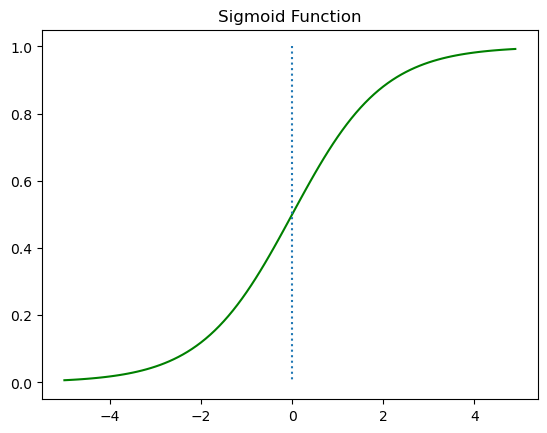

In [5]:
plt.plot(x,y,'g')
plt.plot([0,0], [1.0,0.0], ':')
plt.title('Sigmoid Function')

In [6]:
y1=sigmoid(0.5*x)
y2=sigmoid(x)
y3=sigmoid(2*x)

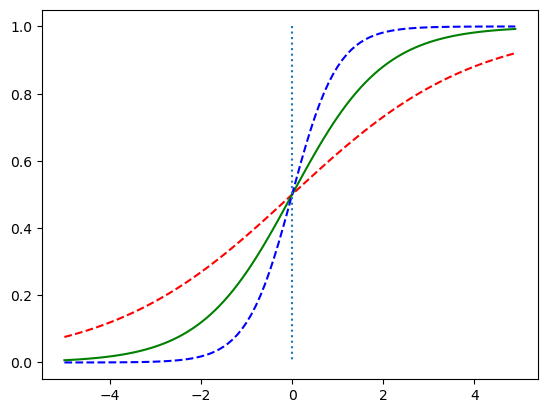

In [7]:
plt.plot(x,y1,'r', linestyle='--')
plt.plot(x,y2, 'g')
plt.plot(x,y3, 'b', linestyle='--')
plt.plot([0,0],[1.0,0.0],':')
plt.show()

In [12]:
torch.manual_seed(1)
x_data=[[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
t_data=[[0],[0],[0],[1],[1],[1]]
x_train=torch.FloatTensor(x_data)
y_train=torch.FloatTensor(t_data)
print(x_train.size())
print(y_train.size())

torch.Size([6, 2])
torch.Size([6, 1])


In [15]:
W=torch.zeros((2,1), requires_grad=True)
b=torch.zeros((1), requires_grad=True)

optimizer=optim.SGD([W, b], lr=0.1)
nb_epoch=1000
costs=[]

In [18]:
for epoch in range(nb_epoch):
    y=torch.sigmoid(x_train.matmul(W)+b)
    h=torch.sigmoid(y)

    cost=-(y_train*torch.log(h) + (1-y_train) * torch.log(1-h)).mean()

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    costs.append(cost.item())

    if epoch % 100 == 0:
        print('Epoch : ',epoch, 'Cost : ',cost.item() )

Epoch :  0 Cost :  0.6165992617607117
Epoch :  100 Cost :  0.6141030788421631
Epoch :  200 Cost :  0.6114951968193054
Epoch :  300 Cost :  0.6087435483932495
Epoch :  400 Cost :  0.6058503985404968
Epoch :  500 Cost :  0.6028472185134888
Epoch :  600 Cost :  0.5997834801673889
Epoch :  700 Cost :  0.5967126488685608
Epoch :  800 Cost :  0.5936812162399292
Epoch :  900 Cost :  0.5907243490219116


In [20]:
h2=torch.sigmoid(x_train.matmul(W)+b)
print(h2)

tensor([[0.0453],
        [0.1086],
        [0.4603],
        [0.6104],
        [0.8489],
        [0.9657]], grad_fn=<SigmoidBackward0>)


In [21]:
prediction=h>=torch.FloatTensor([0.5])
print(prediction)

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True]])
